In [1]:
import pycaret
import pandas as pd
import numpy as np

In [1]:
# check installed version
pycaret.__version__

'3.2.0'

In [2]:
# Dataset Pasajeros
url='https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Pasajeros_TP.csv'
pasajeros_d = pd.read_csv(url)
pasajeros_d.rename({'FechaRecaudacion': 'fecha', 'Cantidad_Pasajeros': 'pas'}, axis=1, inplace=True)
pasajeros_d = pasajeros_d[(pasajeros_d['fecha'] >= '2021-10-01') & (pasajeros_d['fecha'] <= '2023-10-30')]

In [3]:
# Para la fecha jueves 13 de octubre del 2022, se observa el valor de 1 y para corregir este dato se optó por sacar el promedio de los dos dias posteriores y el valor del día anterior.
# Además se agregan las observaciones que corresponden a los días 2022-05-17, 2022-10-12, 2023-06-13 y 2023-06-22 con el valor de 1, posteriormente se reemplaza este valor por el promedio de los dos dias posteriores y el valor del día anterior.
# Agregar fechas faltantes
nuevas_observaciones = pd.DataFrame([{'fecha': '2022-05-17', 'pas': 1},
                                     {'fecha': '2022-10-12', 'pas': 1},
                                     {'fecha': '2023-06-13', 'pas': 1},
                                     {'fecha': '2023-06-22', 'pas': 1}])
pasajeros_d = pd.concat([pasajeros_d, nuevas_observaciones], ignore_index=True)

# Ordenar el DataFrame por la columna de fechas
pasajeros_d = pasajeros_d.sort_values(by='fecha', ascending=True)

# Resetear el índice
pasajeros_d = pasajeros_d.reset_index(drop=True)

# Convertir la columna 'Fecha' a tipo datetime
pasajeros_d['fecha'] = pd.to_datetime(pasajeros_d['fecha'], dayfirst=True, format="%Y-%m-%d")

# Encontrar el índice correspondiente a '2022-05-17'
index_to_replace = pasajeros_d.index[pasajeros_d['fecha'] == '2022-05-17'][0]

# Calcular el promedio de una semana previa y una semana posterior
average_value_17 = (pasajeros_d.loc[index_to_replace - 7, 'pas'] + pasajeros_d.loc[index_to_replace + 7, 'pas']) / 2

# Redondear el promedio con 0 decimales
average_value_17 = round(average_value_17, 0)

# Reemplazar el valor en el DataFrame
pasajeros_d.loc[index_to_replace, 'pas'] = average_value_17

# Encontrar el índice correspondiente a '2022-10-12'
index_to_replace = pasajeros_d.index[pasajeros_d['fecha'] == '2022-10-12'][0]

# Calcular el promedio de un día previo y un día posterior
average_value_12 = (pasajeros_d.loc[index_to_replace - 7, 'pas'] + pasajeros_d.loc[index_to_replace + 7, 'pas']) / 2

# Redondear el promedio con 0 decimales
average_value_12 = round(average_value_12, 0)

# Reemplazar el valor en el DataFrame
pasajeros_d.loc[index_to_replace, 'pas'] = average_value_12

# Encontrar el índice correspondiente a '2022-10-13'
index_to_replace = pasajeros_d.index[pasajeros_d['fecha'] == '2022-10-13'][0]

# Calcular el promedio de un día previo y un día posterior
average_value_13 = (pasajeros_d.loc[index_to_replace - 7, 'pas'] + pasajeros_d.loc[index_to_replace + 7, 'pas']) / 2

# Redondear el promedio con 0 decimales
average_value_13 = round(average_value_13, 0)

# Reemplazar el valor en el DataFrame
pasajeros_d.loc[index_to_replace, 'pas'] = average_value_13

# Encontrar el índice correspondiente a '2023-06-13'
index_to_replace = pasajeros_d.index[pasajeros_d['fecha'] == '2023-06-13'][0]

# Calcular el promedio de un día previo y un día posterior
average_value_6 = (pasajeros_d.loc[index_to_replace - 7, 'pas'] + pasajeros_d.loc[index_to_replace + 7, 'pas']) / 2

# Redondear el promedio con 0 decimales
average_value_6 = round(average_value_6, 0)

# Reemplazar el valor en el DataFrame
pasajeros_d.loc[index_to_replace, 'pas'] = average_value_6

# Encontrar el índice correspondiente a '2023-06-22'
index_to_replace = pasajeros_d.index[pasajeros_d['fecha'] == '2023-06-22'][0]

# Calcular el promedio de un día previo y un día posterior
average_value_22 = (pasajeros_d.loc[index_to_replace - 7, 'pas'] + pasajeros_d.loc[index_to_replace + 7, 'pas']) / 2

# Redondear el promedio con 0 decimales
average_value_22 = round(average_value_22, 0)

# Reemplazar el valor en el DataFrame
pasajeros_d.loc[index_to_replace, 'pas'] = average_value_22

# Formato diario
pasajeros_d.set_index('fecha', inplace=True)

pasajeros_d = pasajeros_d.asfreq('d')

pasajeros_d = pasajeros_d['pas']
pasajeros_d.describe()

count       760.000000
mean     175952.678947
std       82497.043937
min        5582.000000
25%      106144.500000
50%      178343.000000
75%      249701.000000
max      319953.000000
Name: pas, dtype: float64

<AxesSubplot: xlabel='fecha'>

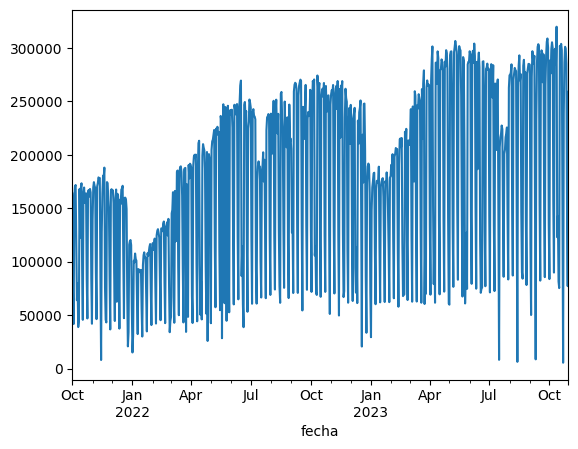

In [4]:
# plot the dataset
pasajeros_d.plot()

# Setup

In [5]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(pasajeros_d, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,pas
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(760, 1)"
5,Transformed data shape,"(760, 1)"
6,Transformed train set shape,"(757, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [6]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [7]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [8]:
# init setup on exp
exp.setup(pasajeros_d, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,pas
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(760, 1)"
5,Transformed data shape,"(760, 1)"
6,Transformed train set shape,"(757, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


# Check stats

In [9]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,760.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,175952.678947
3,Summary,Statistics,Transformed,Median,,178343.0
4,Summary,Statistics,Transformed,Standard Deviation,,82497.043937
5,Summary,Statistics,Transformed,Variance,,6805762258.363193
6,Summary,Statistics,Transformed,Kurtosis,,-1.234176
7,Summary,Statistics,Transformed,Skewness,,-0.145233
8,Summary,Statistics,Transformed,# Distinct Values,,759.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",2281.630321


# Compare models

In [10]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6314,0.4586,17031.8870,24292.7587,1.8601,0.2310,0.7471,0.1333
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.6340,0.3860,17083.2677,20427.0224,0.2651,0.1767,0.8820,0.0500
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7421,0.4741,20001.1960,25101.0061,1.7958,0.2406,0.7998,0.1833
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.7967,0.4805,21472.9050,25436.5519,1.7215,0.2471,0.8287,0.1200
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8384,0.5037,22637.1402,26698.9934,1.8424,0.2472,-0.2282,0.2633
auto_arima,Auto ARIMA,0.9561,0.5862,25798.6703,31046.9650,1.4558,0.2592,-1.5384,26.5067
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.9596,0.5944,25905.3017,31494.9548,2.0415,0.2619,-0.2610,0.9233
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9653,0.5669,26041.5789,30022.3575,1.8186,0.2591,0.2732,0.1400
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0022,0.6281,27038.3114,33278.7971,2.2296,0.2635,-0.2451,0.0800
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.0909,0.6577,29440.1033,34842.7745,2.0251,0.2765,-1.4872,0.0533


In [11]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6314,0.4586,17031.8870,24292.7587,1.8601,0.2310,0.7471,0.1267
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.6340,0.3860,17083.2677,20427.0224,0.2651,0.1767,0.8820,0.0533
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.7421,0.4741,20001.1960,25101.0061,1.7958,0.2406,0.7998,0.1633
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.7967,0.4805,21472.9050,25436.5519,1.7215,0.2471,0.8287,0.1233
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.8384,0.5037,22637.1402,26698.9934,1.8424,0.2472,-0.2282,0.1967
auto_arima,Auto ARIMA,0.9561,0.5862,25798.6703,31046.9650,1.4558,0.2592,-1.5384,23.6100
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,0.9596,0.5944,25905.3017,31494.9548,2.0415,0.2619,-0.2610,0.5833
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.9653,0.5669,26041.5789,30022.3575,1.8186,0.2591,0.2732,0.1267
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.0022,0.6281,27038.3114,33278.7971,2.2296,0.2635,-0.2451,0.0700
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.0909,0.6577,29440.1033,34842.7745,2.0251,0.2765,-1.4872,0.0467


BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                        4, 3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=GradientBoostingRegressor(random_state=123), sp=7,
                    window_length=7)

# Analyze Model

In [12]:
# plot forecast
plot_model(best, plot = 'forecast')

In [13]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [14]:
# residuals plot
plot_model(best, plot = 'residuals')

In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.
In sample predictions has not been implemented for this estimator of type 'BaseCdsDtForecaster' in `sktime`. When this is implemented, it will be enabled by default in pycaret.


# Prediction

In [15]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,GradientBoostingRegressor,0.7743,0.4084,21011.3578,21728.4537,0.1827,0.1625,0.9156


In [16]:
# show predictions df
holdout_pred.head()

,y_pred
2023-10-28,164408.7707
2023-10-29,105866.6291
2023-10-30,240259.3265


In [17]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
2023-10-28,164408.7707
2023-10-29,105866.6291
2023-10-30,240259.3265
2023-10-31,276650.6478
2023-11-01,300818.9671
2023-11-02,297563.3277
2023-11-03,276256.5441
2023-11-04,166689.5610
2023-11-05,100012.1886
2023-11-06,242331.7520
